# CNN Model to Predict Rainfall in milli-meter.

# Day 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Splitting Was Done from Year 2010. Same as in Paper.
train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")

In [4]:
train.head()

,Year,Month,Rainfall amount (millimetres),Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1957,1,66.8,27.8,23.3
1,1957,1,88.4,27.8,22.8
2,1957,1,122.7,26.7,22.8
3,1957,1,37.6,27.2,23.3
4,1957,1,24.9,29.4,21.1


In [5]:
test.head()

,Year,Month,Rainfall amount (millimetres),Maximum temperature (Degree C),Minimum temperature (Degree C)
0,2011,1,19.2,29.3,25.4
1,2011,1,84.2,27.7,23.6
2,2011,1,1.6,30.5,23.9
3,2011,1,2.0,30.9,22.9
4,2011,1,0.0,31.7,22.8


In [6]:
selected_columns = ['Month','Maximum temperature (Degree C)','Minimum temperature (Degree C)']
X_train = train[selected_columns]
X_test = test[selected_columns]

In [9]:
X_train

,Month,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1,27.8,23.3
1,1,27.8,22.8
2,1,26.7,22.8
3,1,27.2,23.3
4,1,29.4,21.1
...,...,...,...
19718,12,31.0,24.6
19719,12,33.0,25.6
19720,12,31.7,24.8
19721,12,31.8,24.3


In [15]:
column = ['Rainfall amount (millimetres)']
y_train = train[column]
y_test = test[column]

In [16]:
y_train

,Rainfall amount (millimetres)
0,66.8
1,88.4
2,122.7
3,37.6
4,24.9
...,...
19718,20.6
19719,0.2
19720,16.0
19721,0.0


In [14]:
X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)

/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_3771/742789604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_3771/742789604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)


In [17]:
#Applying OneHotEncoding to X_train
dummy = pd.get_dummies(X_train['Month'])
q = dummy.astype('int')
X_train_ohe = pd.concat([X_train,q],axis = 1)
X_train_ohe.drop('Month',axis = 1,inplace = True)

In [18]:
#OneHotEncoding to X_test
dummy = pd.get_dummies(X_test['Month'])
q = dummy.astype('int')
X_test_ohe = pd.concat([X_test,q],axis = 1)
X_test_ohe.drop('Month',axis = 1,inplace = True)
X_train_ohe

,Maximum temperature (Degree C),Minimum temperature (Degree C),April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,27.8,23.3,0,0,0,0,1,0,0,0,0,0,0,0
1,27.8,22.8,0,0,0,0,1,0,0,0,0,0,0,0
2,26.7,22.8,0,0,0,0,1,0,0,0,0,0,0,0
3,27.2,23.3,0,0,0,0,1,0,0,0,0,0,0,0
4,29.4,21.1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19718,31.0,24.6,0,0,1,0,0,0,0,0,0,0,0,0
19719,33.0,25.6,0,0,1,0,0,0,0,0,0,0,0,0
19720,31.7,24.8,0,0,1,0,0,0,0,0,0,0,0,0
19721,31.8,24.3,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

# Model
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=24, kernel_size=4, activation='relu', input_shape=(14, 1)))

# First pooling layer
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

# Second pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten 
model.add(Flatten())

# Dense output layer
model.add(Dense(1,activation='tanh'))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Training
history = model.fit(X_train_ohe,y_train, epochs=30, batch_size=32, validation_data=(X_test_ohe, y_test))

# Evaluate the model
loss = model.evaluate(X_test_ohe, y_test)
print("Test Loss:", loss)



Epoch 1/30
617/617 [==============================] - 1s 630us/step - loss: 507.7922 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 2/30
617/617 [==============================] - 0s 545us/step - loss: 507.7914 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 3/30
617/617 [==============================] - 0s 543us/step - loss: 507.7914 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 4/30
617/617 [==============================] - 0s 543us/step - loss: 507.7913 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 5/30
617/617 [==============================] - 0s 543us/step - loss: 507.7915 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 6/30
617/617 [==============================] - 0s 545us/step - loss: 507.7917 - accuracy: 0.0084 - val_loss: 583.8151 - val_accuracy: 0.0089
Epoch 7/30
617/617 [==============================] - 0s 547us/step - loss: 507.7914 - accuracy: 0.0084 - val_lo

In [29]:
# Predict on new data
y_pred = model.predict(X_test_ohe)

109/109 [==============================] - 0s 320us/step


Text(0.5, 1.0, 'Loss Function')

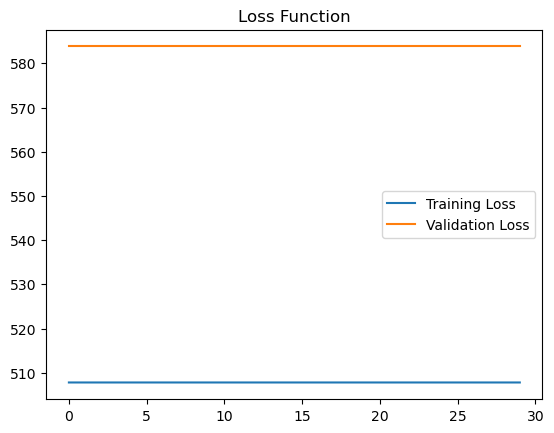

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training Loss",'Validation Loss'])
plt.title('Loss Function')

Text(0.5, 1.0, 'Accuracy')

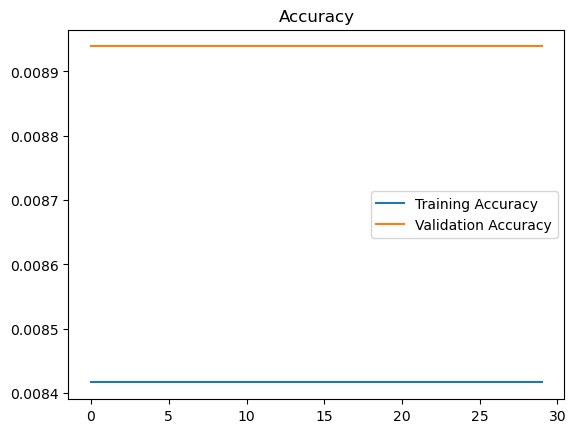

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training Accuracy",'Validation Accuracy'])
plt.title('Accuracy')